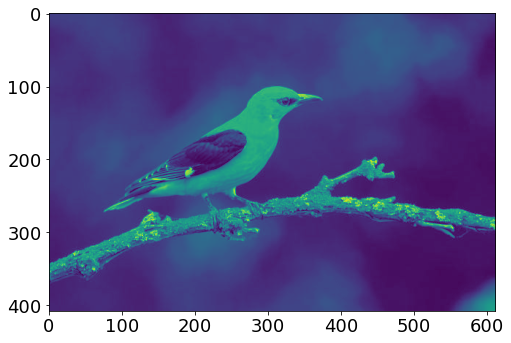

In [31]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

A = imread('bird.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale
plt.imshow(B)
plt.show()


# Wavelet Compression

In [32]:
n = 5 #n specifies the number of decomposition levels.
w = 'db1' #w is the wavelet used for the decomposition (in this case, 'db1' or Daubechies wavelet with one vanishing moment)

coeffs = pywt.wavedec2(B,wavelet=w,level=n) #2-D wavelet decomposition

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs) #pywt.coeffs_to_array converts the wavelet coefficients to a 1D array (coeff_arr) 

Csort = np.sort(np.abs(coeff_arr.reshape(-1))) #The code sorts the absolute values of wavelet coefficients.

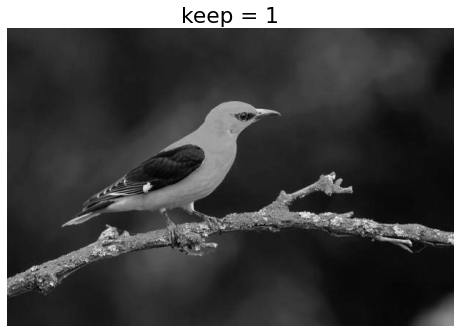

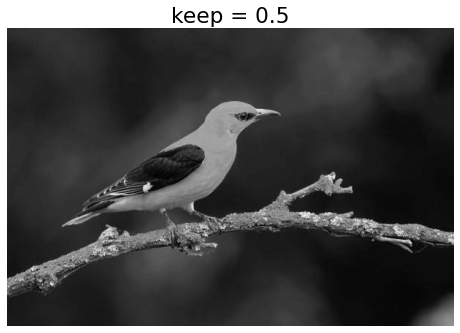

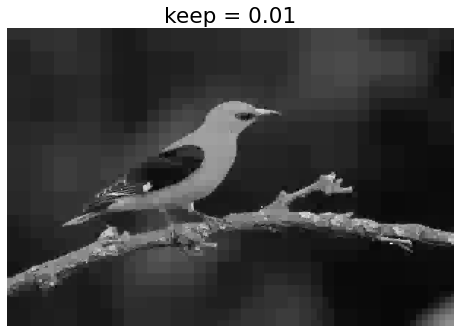

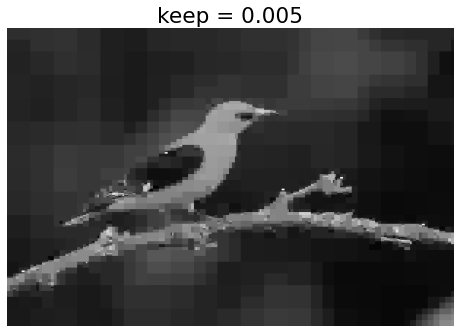

In [33]:
for keep in (1, 0.5, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w) #pywt.waverec2 performs 2D wavelet reconstruction to obtain the compressed image.
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))